# Principal Component Analysis (PCA) - Linear

[scikit-learn Doc](http://scikit-learn.org/stable/modules/decomposition.html#pca)

[scikit-learn Parameters](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

* Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.


1901 by Karl Pearson

* Unsupervised Machine Learning

[Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)


* Statistical procedure that utilise [orthogonal transformation](https://en.wikipedia.org/wiki/Orthogonal_transformation) technology

* Convert possible correlated features (predictors) into linearly uncorrelated features (predictors) called **principal components**

* \# of principal components <= number of features (predictors)

* First principal component explains the largest possible variance

* Each subsequent component has the highest variance subject to the restriction that it must be orthogonal to the preceding components. 

* A collection of the components are called vectors.

* Sensitive to scaling


**Note:**

* Used in exploratory data analysis (EDA) 

* Visualize genetic distance and relatedness between populations. 


* Method:

  * Eigenvalue decomposition of a data covariance (or correlation) matrix

  * Singular value decomposition of a data matrix (After mean centering / normalizing ) the data matrix for each attribute.


* Output

  * Component scores, sometimes called **factor scores** (the transformed variable values)
  
  * **loadings** (the weight)

* Data compression and information preservation 

* Visualization

* Noise filtering

* Feature extraction and engineering

In [99]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [118]:
rnd_num = np.random.RandomState(42)
X = np.dot(rnd_num.rand(2,2), rnd_num.randn(2, 5000)).T # T for Transpose  # base
#X = np.dot(rnd_num.rand(3,3), rnd_num.randn(3, 5000)).T # T for Transpose
# X = np.dot(rnd_num.rand(4,4), rnd_num.randn(4, 5000)).T # T for Transpose # too many to disply ??

In [119]:
# rnd_num.binomial(10, .5 , 1000)

In [120]:
X

array([[ 0.60901126,  0.2673155 ],
       [-1.29912439, -0.9342167 ],
       [ 1.58828601,  1.78365725],
       ...,
       [-0.46026448, -0.51478623],
       [-1.24047913, -1.67202716],
       [-0.018656  , -0.17552132]])

In [121]:
X[:, 0] = - X[:, 0]

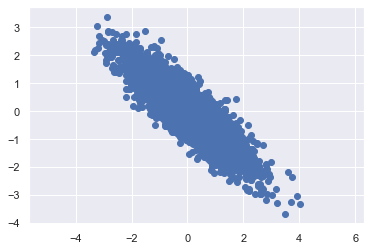

In [122]:
plt.scatter(X[:, 0], X[:, 1]);
plt.axis('equal');

## Principal Components Identification

In [123]:
from sklearn.decomposition import PCA

In [124]:
pca = PCA(n_components=2) # base
# pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=2)

In [125]:
print(pca.components_) # these are the factors

[[ 0.74020138 -0.67238524]
 [ 0.67238524  0.74020138]]


In [126]:
print(pca.explained_variance_)

[1.83472322 0.12289657]


In [127]:
# this ratio is in terms of a percentage. Here ,the first componant explains most of the variablity of the underlying data.
print(pca.explained_variance_ratio_) 

[0.93722143 0.06277857]


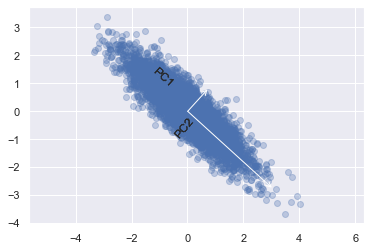

In [128]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)  # base


# plot data

for k, v in zip(pca.explained_variance_, pca.components_):
    vec = v * 3 * np.sqrt(k)
    
    ax = plt.gca()
    arrowprops=dict(arrowstyle='<-',
                    linewidth=1,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', pca.mean_, pca.mean_ + vec, arrowprops=arrowprops)
    ax.text(-0.90, 1.2,'PC1', ha='center', va='center', rotation=-42, size=12)
    ax.text(-0.1,-0.6,'PC2', ha='center', va='center', rotation=50, size=12)
plt.axis('equal');

* Two principal components
* Length denotes the significance 

This transformation from data axes to principal axes is as an affine transformation, which basically means it is composed of a translation, rotation, and uniform scaling.

## Dimensionality Reduction with PCA

In [44]:
pca = PCA(n_components=1)
pca.fit(X)
PCA_Reduced = pca.transform(X)

In [45]:
X.shape

(5000, 2)

In [46]:
PCA_Reduced.shape

(5000, 1)

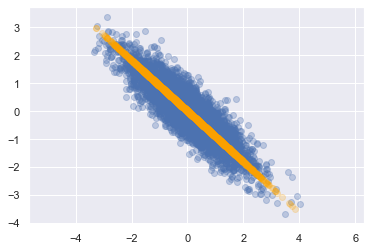

In [47]:
X_new = pca.inverse_transform(PCA_Reduced)
plt.scatter(X[:, 0], X[:, 1], alpha=0.3);
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.2, c='orange')
plt.axis('equal');

The Orange is the PCA. the single compnant we were able to extract out. PCA1 - containing the bulk of the content.
The light blue is the original data

***